<a href="https://colab.research.google.com/github/plaban1981/churn-prediction/blob/master/Customer_Segmentation_Wholesale_Cusomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import data science libraries

In [0]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


{'Wholesale customers data.csv': b'Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen\r\n2,3,12669,9656,7561,214,2674,1338\r\n2,3,7057,9810,9568,1762,3293,1776\r\n2,3,6353,8808,7684,2405,3516,7844\r\n1,3,13265,1196,4221,6404,507,1788\r\n2,3,22615,5410,7198,3915,1777,5185\r\n2,3,9413,8259,5126,666,1795,1451\r\n2,3,12126,3199,6975,480,3140,545\r\n2,3,7579,4956,9426,1669,3321,2566\r\n1,3,5963,3648,6192,425,1716,750\r\n2,3,6006,11093,18881,1159,7425,2098\r\n2,3,3366,5403,12974,4400,5977,1744\r\n2,3,13146,1124,4523,1420,549,497\r\n2,3,31714,12319,11757,287,3881,2931\r\n2,3,21217,6208,14982,3095,6707,602\r\n2,3,24653,9465,12091,294,5058,2168\r\n1,3,10253,1114,3821,397,964,412\r\n2,3,1020,8816,12121,134,4508,1080\r\n1,3,5876,6157,2933,839,370,4478\r\n2,3,18601,6327,10099,2205,2767,3181\r\n1,3,7780,2495,9464,669,2518,501\r\n2,3,17546,4519,4602,1066,2259,2124\r\n1,3,5567,871,2010,3383,375,569\r\n1,3,31276,1917,4469,9408,2381,4334\r\n2,3,26373,36423,22019,5154,4337,16523\r\n2,3

## Reading training data from the below URL

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(url)

In [9]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Descriptive Statistics

In [10]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Genearte Customer segment using KMeans Clustering

In [0]:
from sklearn.cluster  import KMeans
from sklearn.preprocessing import MinMaxScaler
sum_of_squared_errors = []
for k in range(10,110,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df.values)
  sum_of_squared_errors.append(kmeans.inertia_)


## finding optimum k value

Text(0.5, 1.0, 'Finding Optimum K value')

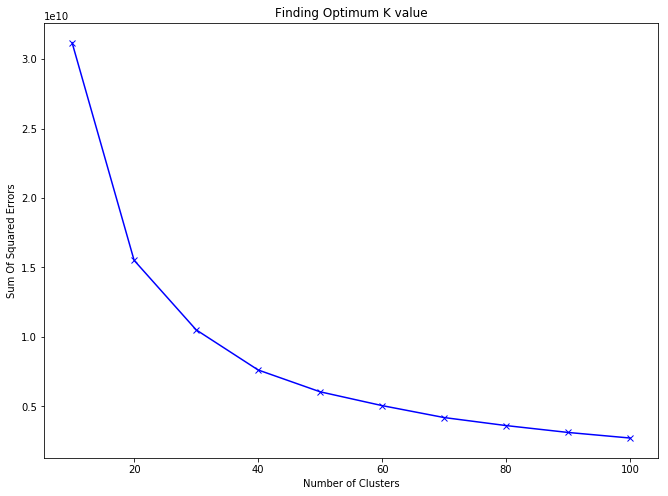

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,8))
plt.plot([k for k in range(10,110,10)],sum_of_squared_errors,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Of Squared Errors')
plt.title('Finding Optimum K value')

In [25]:
df_k = pd.DataFrame({'k':[k for k in range(10,110,10)],'SSE':[np.round(val,5) for val in sum_of_squared_errors]})
df_k

,k,SSE
0,10,3.118269e+10
1,20,1.551827e+10
2,30,1.051617e+10
3,40,7.624562e+09
4,50,6.052865e+09
5,60,5.058437e+09
6,70,4.199056e+09
7,80,3.621078e+09
8,90,3.125991e+09
9,100,2.724411e+09


## optimum k value determined to be 30

In [0]:
kmeans = KMeans(n_clusters=30,max_iter=100,random_state=1)
kmeans.fit(df.values)
cluster = kmeans.predict(df.values)

In [0]:
df['Customer_Segment'] = cluster

In [28]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Customer_Segment
0,2,3,12669,9656,7561,214,2674,1338,10
1,2,3,7057,9810,9568,1762,3293,1776,10
2,2,3,6353,8808,7684,2405,3516,7844,10
3,1,3,13265,1196,4221,6404,507,1788,17
4,2,3,22615,5410,7198,3915,1777,5185,14


In [0]:
test_data = np.array([2,3,22615,5410,7198,3915,1777,5185])


## reformating the test data to have 8 fetures and 1 row

In [38]:
print(f'cluster predicted : {kmeans.predict(test_data.reshape(1,8))}')

cluster predicted : [14]
